In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.svm
import sklearn.naive_bayes
import sklearn.metrics
from sklearn.model_selection import train_test_split
import glob
import seaborn as sns
import os.path
import time
import warnings
warnings.filterwarnings("ignore")  # Ignore sklearn deprecation warnings
warnings.filterwarnings("ignore", category=FutureWarning)       # Ignore sklearn deprecation warnings

In [2]:
current_directory = os.path.dirname(os.getcwd())
project_directory = os.path.split(current_directory)[0]
dataset_directory = os.path.join(project_directory, 'datasets')

occupancy_dataset_directory = os.path.join(dataset_directory, '1_occupancy')
healthy_older_people_dataset_directory = os.path.join(dataset_directory, '2_healthy_older_people')
bitcoin_heist_ransonware_address_dataset_directory = os.path.join(dataset_directory, '3_bitcoin_heist_ransonware_address')
bank_additional_dataset_directory = os.path.join(dataset_directory, '4_bank_additional')
montreal_crime_dataset_directory = os.path.join(dataset_directory, '5_interventionscitoyendo')
credit_cards_dataset_directory = os.path.join(dataset_directory, '6_credit_cards')
census_income_dataset_directory = os.path.join(dataset_directory, '7_census_income')
yeast_dataset_directory = os.path.join(dataset_directory, '8_yeast')
magic_gamma_dataset_directory = os.path.join(dataset_directory, '9_magic_gamma')

print(os.listdir(dataset_directory))
print(occupancy_dataset_directory
      , healthy_older_people_dataset_directory
      , bitcoin_heist_ransonware_address_dataset_directory
      , bank_additional_dataset_directory)

['1_occupancy', '2_healthy_older_people', '3_bitcoin_heist_ransonware_address', '4_bank_additional', '5_interventionscitoyendo', '6_credit_cards', '7_census_income', '8_yeast', '9_magic_gamma', 'urls.txt']
C:\Users\manjo\Documents\GitHub\COMP-6321-ML\datasets\1_occupancy C:\Users\manjo\Documents\GitHub\COMP-6321-ML\datasets\2_healthy_older_people C:\Users\manjo\Documents\GitHub\COMP-6321-ML\datasets\3_bitcoin_heist_ransonware_address C:\Users\manjo\Documents\GitHub\COMP-6321-ML\datasets\4_bank_additional


In [3]:
def svm_classification(X_train,y_train,X_test,y_test):
    start = time.time()
    svm_model = sklearn.svm.SVC(random_state=0,probability=True)
    svm_model.fit(X_train,y_train)
    t = time.time()-start
#     y_predicttrain = svm_model.predict(X_train)
#     y_predicttest = svm_model.predict(X_test)  
    
    return svm_model,t;

In [4]:
def gaussian_classification(X_train,y_train,X_test,y_test,probs):
    start = time.time()
    gnb_model = sklearn.naive_bayes.GaussianNB(priors=probs)
    gnb_model.fit(X_train,y_train)
    t = time.time()-start
    return gnb_model,t;

In [5]:
def svm_classification_tuned(X_train,y_train):
    start = time.time()
    svm_ = sklearn.svm.SVC(kernel='rbf')
    c = np.logspace(-2,2,5)
    gamma = np.logspace(-2,1,4)
    param_grid = {'C':c,'gamma':gamma}
    svm_model_gs = sklearn.model_selection.GridSearchCV(svm_,param_grid,verbose=1,cv=5) 
    svm_model_gs.fit(X_train,y_train)
    t = time.time()-start
    return svm_model_gs,t;

In [6]:
def plot_feature_outcome_corr(data,palette):
    i=1
    rows = np.ceil(len(data.columns)/3)
    
    for j in range(0,len(data.columns)-1):
        if( (i-1) %3.0 == 0):
            fig = plt.figure(figsize=(16,rows*5)) 
        ax = plt.subplot(rows, 3, i) 
        g = sns.FacetGrid(data, hue=data.columns[-1],palette=palette)
        g.map(sns.distplot,data.columns[j] , kde=False, bins=15,ax=ax)
        plt.title('{:s}'.format(data.columns[j]))
        ax.legend(title=data.columns[-1])
        i = i+1
        plt.close()

In [7]:
# Model plotting code
def plotModel (model,X_train,y_train,X_test,y_test):
    
    y_predicttrain = model.predict(X_train)
    y_predicttest = model.predict(X_test)
    ac_train=sklearn.metrics.accuracy_score(y_train, y_predicttrain)*100
    ac_test=sklearn.metrics.accuracy_score(y_test, y_predicttest)*100
    if np.unique(y_train).size>2:
        lb = sklearn.preprocessing.LabelBinarizer()
        y_test=lb.fit_transform(y_test)
        y_predicttest=lb.transform(y_predicttest)
        roc=sklearn.metrics.roc_auc_score(y_test, y_predicttest, multi_class="ovr", average="weighted")*100        
    else:
        roc=sklearn.metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])*100
        sklearn.metrics.plot_roc_curve(model, X_test, y_test)
    return ac_train,ac_test,roc


 ## 1.OCCUPANCY DATASET


### Data Loading

In [52]:
training_dataset_url = os.path.join(occupancy_dataset_directory, 'occupancy_data', 'datatraining.txt')
test_dataset_url = os.path.join(occupancy_dataset_directory, 'occupancy_data', 'datatest.txt')

data_occupancy = np.loadtxt(training_dataset_url,delimiter=',', skiprows=1, usecols = (2,3,4,5,6,7))
data_occupany_test=np.loadtxt(test_dataset_url, delimiter=',', skiprows=1, usecols = (2,3,4,5,6,7))
X_train=data_occupancy[:, 0:5]
y_train=data_occupancy[:, 5].astype(np.int32)
X_test=data_occupany_test[:, 0:5]
y_test=data_occupany_test[:, 5].astype(np.int32)

### Plot Feature-Outcome correlation

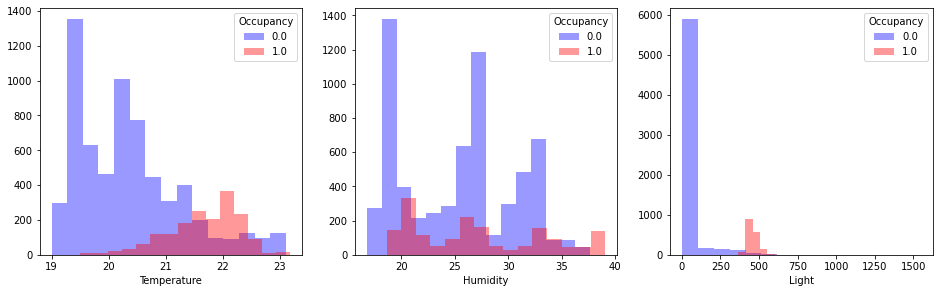

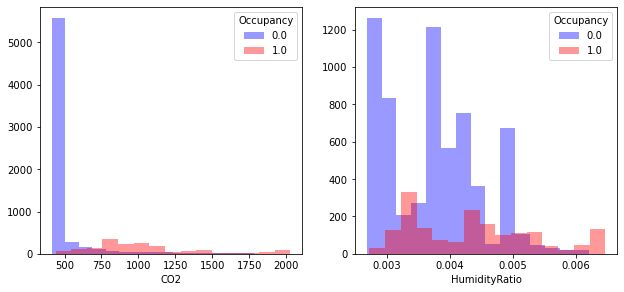

In [53]:
cols = ['Temperature','Humidity','Light','CO2','HumidityRatio','Occupancy']
data = pd.DataFrame(data=data_occupancy,columns=cols)
palette={0: "b", 1: "r"}
plot_feature_outcome_corr(data,palette)

### SVM

Elapsed time:            1.1228 sec
Training accuracy score: 98.8702%
Test accuracy score:     97.6735%
ROC AUC score:           98.3619%


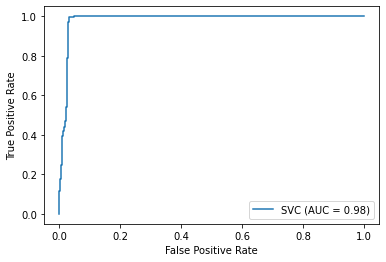

In [54]:
model,tym = svm_classification(X_train,y_train,X_test,y_test)
train_acc,test_acc,roc = plotModel(model,X_train,y_train,X_test,y_test)
print ("Elapsed time:            "+"{:.4f}".format(tym)+" sec")
print ("Training accuracy score: "+"{:.4f}".format(train_acc)+"%")
print ("Test accuracy score:     "+"{:.4f}".format(test_acc)+"%")
print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")


### SVM using GRIDSEARCH

In [15]:
model = svm_classification_tuned(X_train,y_train)
print("%.2f training accuracy"%(model.best_score_*100))
print("Best hyperparameters are :",model.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.5min finished


85.63 training accuracy
Best hyperparameters are : {'C': 10.0, 'gamma': 0.01}


In [16]:
y_pred = model.best_estimator_.predict(X_test)
print("%.2f testing accuracy"%(sklearn.metrics.accuracy_score(y_pred,y_test)*100))
print(model.best_estimator_.get_params())

96.06 testing accuracy
{'C': 10.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


### GAUSSIAN NAIVE BAYES

Elapsed time:            0.0122 sec
Training accuracy score: 97.8018%
Test accuracy score:     97.7486%
ROC AUC score:           98.9499%


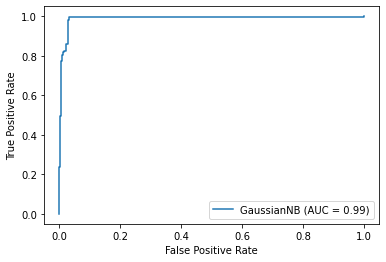

In [55]:
prob_0 = y_train[y_train ==0].shape[0]/y_train.shape[0]
prob_1 = y_train[y_train ==1].shape[0]/y_train.shape[0]
probs = np.array([prob_0,prob_1])
model,tym = gaussian_classification(X_train,y_train,X_test,y_test,probs)
train_acc,test_acc,roc = plotModel(model,X_train,y_train,X_test,y_test)
print ("Elapsed time:            "+"{:.4f}".format(tym)+" sec")
print ("Training accuracy score: "+"{:.4f}".format(train_acc)+"%")
print ("Test accuracy score:     "+"{:.4f}".format(test_acc)+"%")
print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")

## 2.BANK MARKETTING

### Data Loading

In [56]:
training_dataset_url = os.path.join(bank_additional_dataset_directory, 'bank-additional', 'bank-additional', 'bank-additional-full.csv')
test_dataset_url = os.path.join(bank_additional_dataset_directory, 'bank-additional', 'bank-additional', 'bank-additional.csv')


data_bank = pd.read_csv(training_dataset_url, delimiter=';')
data_bank_test= pd.read_csv(test_dataset_url, delimiter=';')

In [57]:
le = sklearn.preprocessing.LabelEncoder()

for i in [1,2,3,4,5,6,7,8,9,14]:
    data_bank.iloc[:,i] = le.fit_transform(data_bank.iloc[:,i])
    data_bank_test.iloc[:,i] = le.fit_transform(data_bank_test.iloc[:,i])
    
bank_labels ={'no':0,'yes':1}
data_bank.y = [bank_labels[i] for i in data_bank.y]
data_bank_test.y = [bank_labels[i] for i in data_bank_test.y]

X_train = data_bank.iloc[:,:-1]
y_train = data_bank.iloc[:,-1].astype('int32')

X_test = data_bank_test.iloc[:,:-1]
y_test = data_bank_test.iloc[:,-1].astype('int32')


### Plot Feature-Outcome correlation

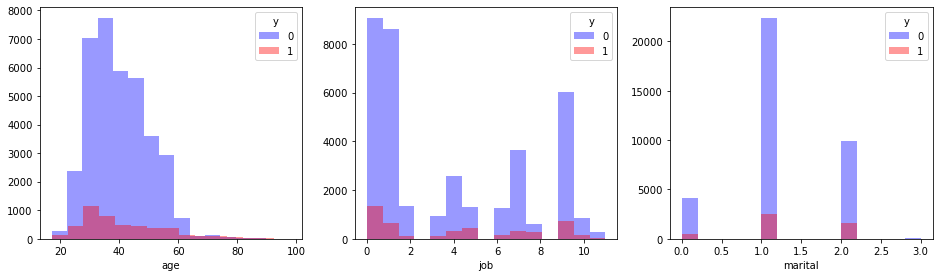

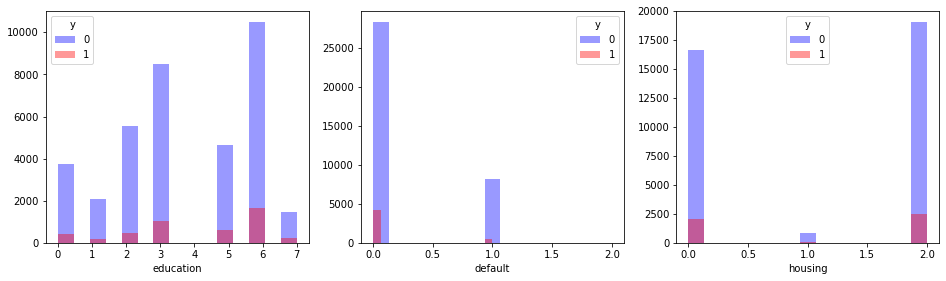

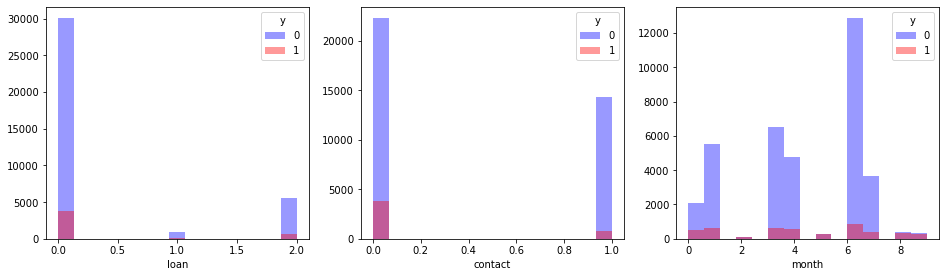

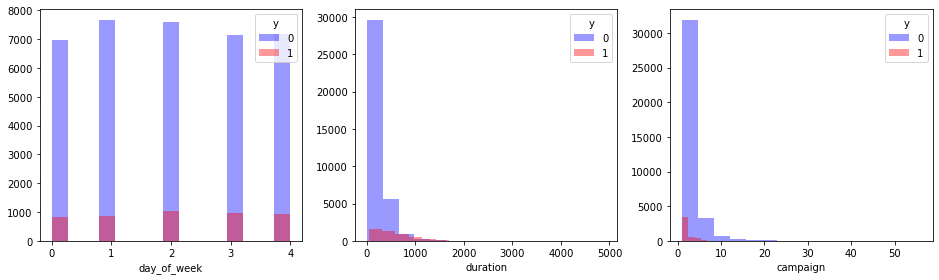

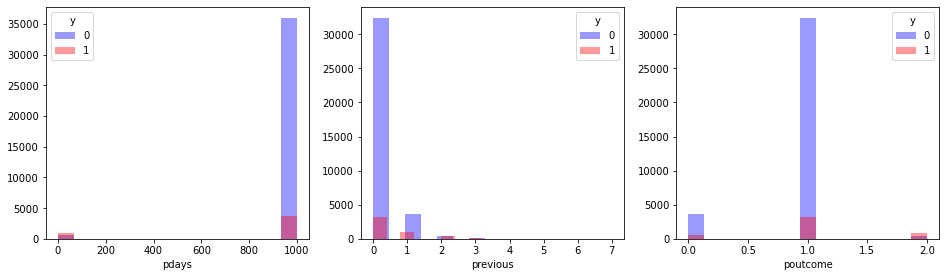

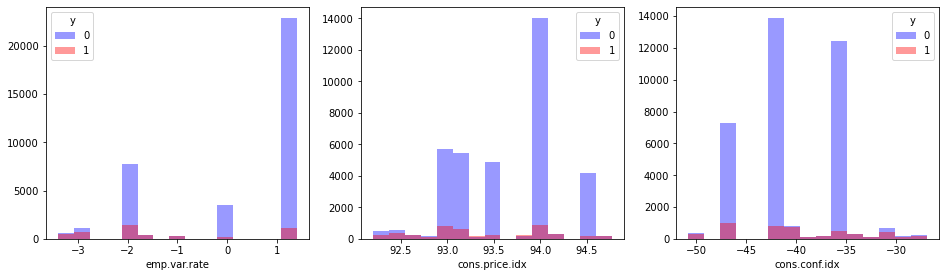

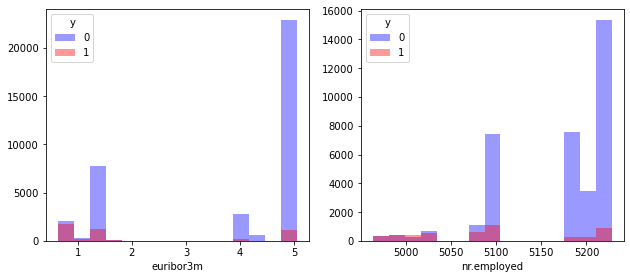

In [97]:
palette ={0: "b", 1: "r"}
plot_feature_outcome_corr(data_bank,palette)

### SVM

Elapsed time:            331.9791 sec
Training accuracy score: 89.7956%
Test accuracy score:     90.0947%
ROC AUC score:           92.3197%


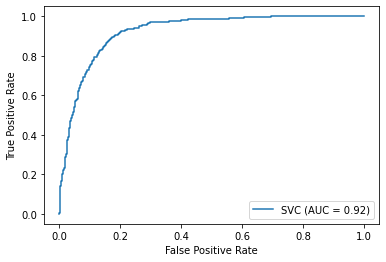

In [58]:
model,tym = svm_classification(X_train,y_train,X_test,y_test)
train_acc,test_acc,roc = plotModel(model,X_train,y_train,X_test,y_test)
print ("Elapsed time:            "+"{:.4f}".format(tym)+" sec")
print ("Training accuracy score: "+"{:.4f}".format(train_acc)+"%")
print ("Test accuracy score:     "+"{:.4f}".format(test_acc)+"%")
print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")

### GAUSSIAN NAIVE BAYES

Elapsed time:            0.0374 sec
Training accuracy score: 84.6557%
Test accuracy score:     84.6565%
ROC AUC score:           84.7305%


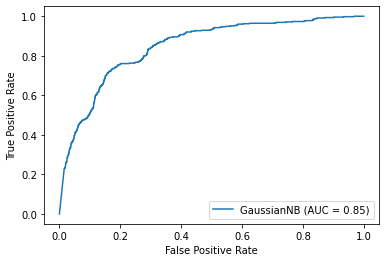

In [59]:
prob_0 = y_train[y_train ==0].shape[0]/y_train.shape[0]
prob_1 = y_train[y_train ==1].shape[0]/y_train.shape[0]
probs = np.array([prob_0,prob_1])
model,tym = gaussian_classification(X_train,y_train,X_test,y_test,probs)
train_acc,test_acc,roc = plotModel(model,X_train,y_train,X_test,y_test)
print ("Elapsed time:            "+"{:.4f}".format(tym)+" sec")
print ("Training accuracy score: "+"{:.4f}".format(train_acc)+"%")
print ("Test accuracy score:     "+"{:.4f}".format(test_acc)+"%")
print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")

## 3.ACTIVITY RECOGNITION IN HEALTHY OLD PEOPLE

### Data Loading

In [60]:
files = glob.glob(os.path.join(healthy_older_people_dataset_directory, 'Datasets_Healthy_Older_People', 'datasets', "S1_Dataset", "d*"))
files.extend(glob.glob(os.path.join(healthy_older_people_dataset_directory, 'Datasets_Healthy_Older_People', 'datasets', "S2_Dataset", "d*")))


ar_files = [pd.read_csv(f, header=None) for f in files]
data_ar=pd.concat(ar_files,ignore_index=True).values

X=data_ar[:, 1:8]
y=data_ar[:, 8].astype('int32')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### Plot Feature-Outcome correlation

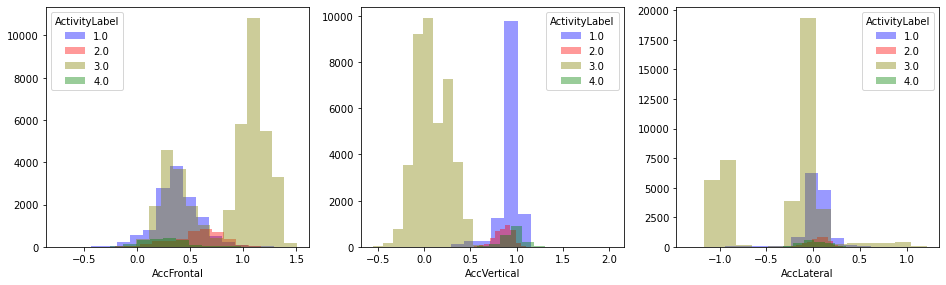

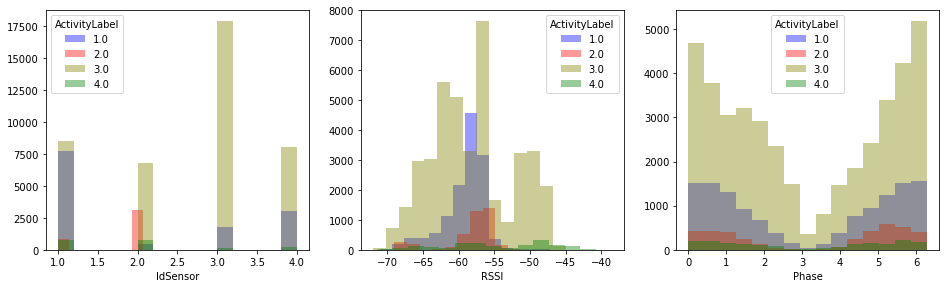

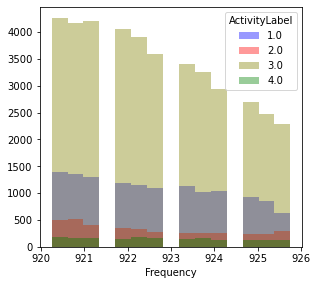

In [16]:
cols =['AccFrontal','AccVertical','AccLateral','IdSensor','RSSI','Phase','Frequency','ActivityLabel']
palette = {1: "b", 2: "r",3:"olive",4:"g"}
data = pd.DataFrame(data =np.hstack((X_train,y_train.reshape(-1,1))),columns=cols )
plot_feature_outcome_corr(data,palette)

### SVM

In [61]:
model,tym = svm_classification(X_train,y_train,X_test,y_test)
train_acc,test_acc,roc = plotModel(model,X_train,y_train,X_test,y_test)
print ("Elapsed time:            "+"{:.4f}".format(tym)+" sec")
print ("Training accuracy score: "+"{:.4f}".format(train_acc)+"%")
print ("Test accuracy score:     "+"{:.4f}".format(test_acc)+"%")
print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")

Elapsed time:            1025.0604 sec
Training accuracy score: 68.7149%
Test accuracy score:     68.0221%
ROC AUC score:           50.0000%


### GAUSSIAN NAIVE  BAYES

In [62]:
prob_1 = y_train[y_train ==1].shape[0]/y_train.shape[0]
prob_2 = y_train[y_train ==2].shape[0]/y_train.shape[0]
prob_3 = y_train[y_train ==3].shape[0]/y_train.shape[0]
prob_4 = y_train[y_train ==4].shape[0]/y_train.shape[0]
probs = np.array([prob_1,prob_2,prob_3,prob_4])

model,tym = gaussian_classification(X_train,y_train,X_test,y_test,probs)
train_acc,test_acc,roc = plotModel(model,X_train,y_train,X_test,y_test)
print ("Elapsed time:            "+"{:.4f}".format(tym)+" sec")
print ("Training accuracy score: "+"{:.4f}".format(train_acc)+"%")
print ("Test accuracy score:     "+"{:.4f}".format(test_acc)+"%")
print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")

Elapsed time:            0.0225 sec
Training accuracy score: 94.1849%
Test accuracy score:     94.0636%
ROC AUC score:           95.2819%


## #MAGIC GAMMA TELESCOPE

### Data Loading

In [18]:
training_dataset_url = os.path.join(magic_gamma_dataset_directory,'MagicGamma.txt')

data_magic = pd.read_csv(training_dataset_url,delimiter=',',names=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fm3Long','fm3Trans','fAlpha','fDist','class'])
X=data_magic.iloc[:,:-1]
y=data_magic.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### Plot Feature-Outcome correlation

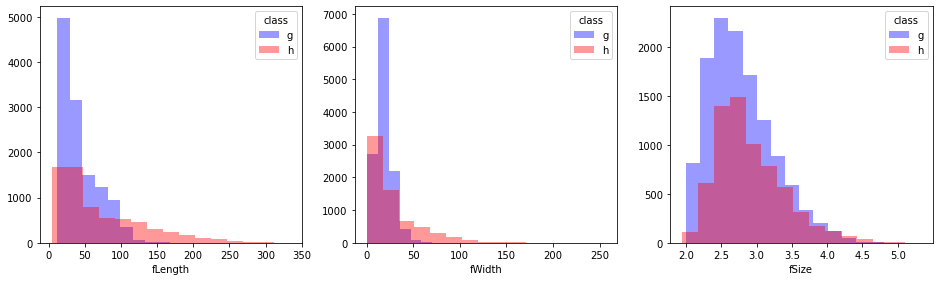

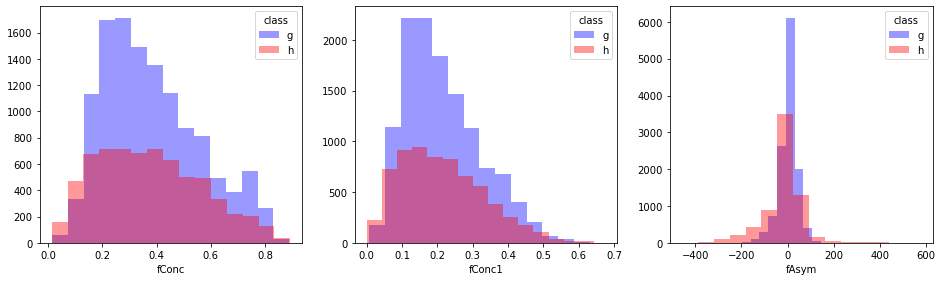

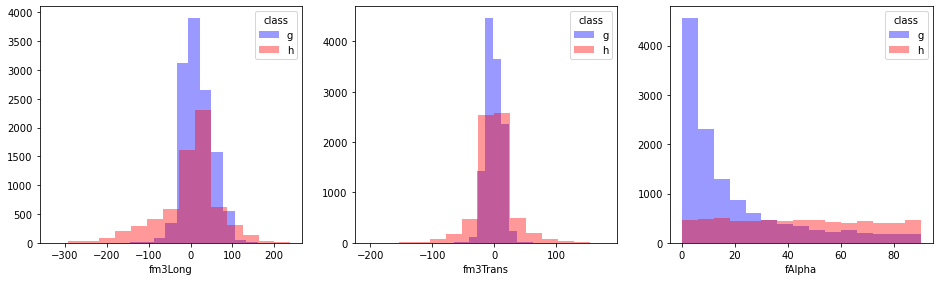

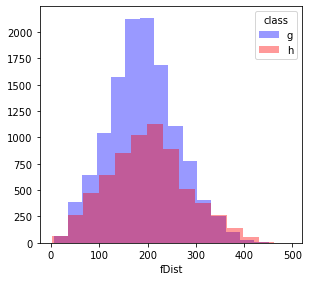

In [19]:
palette = {'g': "b", 'h': "r"}
plot_feature_outcome_corr(pd.concat([X,y],axis=1),palette)


### SVM

In [34]:
model,tym = svm_classification(X_train,y_train,X_test,y_test)
train_acc,test_acc,roc = plotModel(model,X_train,y_train,X_test,y_test)
print ("Elapsed time:            "+"{:.4f}".format(tym)+" sec")
print ("Training accuracy score: "+"{:.4f}".format(train_acc)+"%")
print ("Test accuracy score:     "+"{:.4f}".format(test_acc)+"%")
print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")

82.32 training accuracy
82.54 testing accuracy


## 4.BITCOIN HEIST DATA

### Data Loading

In [8]:
training_dataset_url = os.path.join(bitcoin_heist_ransonware_address_dataset_directory, 'data', 'BitcoinHeistData.csv')

data_bitcoin =pd.read_csv(training_dataset_url,nrows=100000)

bitcoin_labels = {'princetonCerber':1, 'princetonLocky':1, 'montrealCryptoLocker':1,
 'montrealCryptXXX':1, 'paduaCryptoWall':1, 'montrealWannaCry':1,
 'montrealDMALockerv3':1, 'montrealCryptoTorLocker2015':1, 'montrealSamSam':1,
 'montrealFlyper':1, 'montrealNoobCrypt':1, 'montrealDMALocker':1, 'montrealGlobe':1,
 'montrealEDA2':1, 'paduaKeRanger':1, 'montrealVenusLocker':1, 'montrealXTPLocker':1,
 'paduaJigsaw':1, 'montrealGlobev3':1, 'montrealJigSaw':1, 'montrealXLockerv5.0':1,
 'montrealXLocker':1, 'montrealRazy':1, 'montrealCryptConsole':1,
 'montrealGlobeImposter':1, 'montrealSam':1, 'montrealComradeCircle':1,
 'montrealAPT':1, 'white':0}
data_bitcoin.label = [bitcoin_labels[i] for i in data_bitcoin.label]
X = data_bitcoin.iloc[:,:-1]
y= data_bitcoin.iloc[:,-1]

le = sklearn.preprocessing.LabelEncoder()
X.iloc[:,0] = le.fit_transform(X.iloc[:,0])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

### SVM

Elapsed time:            3034.5647 sec
Training accuracy score: 70.2633%
Test accuracy score:     69.8500%
ROC AUC score:           81.6599%


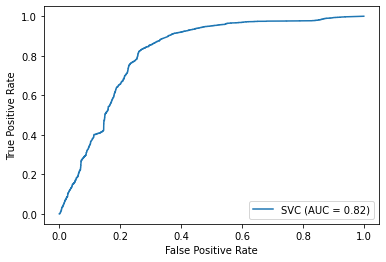

In [9]:
model,tym = svm_classification(X_train,y_train,X_test,y_test)
train_acc,test_acc,roc = plotModel(model,X_train,y_train,X_test,y_test)
print ("Elapsed time:            "+"{:.4f}".format(tym)+" sec")
print ("Training accuracy score: "+"{:.4f}".format(train_acc)+"%")
print ("Test accuracy score:     "+"{:.4f}".format(test_acc)+"%")
print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")


### GAUSSIAN NAIVE BAYES

Elapsed time:            0.0379 sec
Training accuracy score: 46.2811%
Test accuracy score:     45.8500%
ROC AUC score:           70.8246%


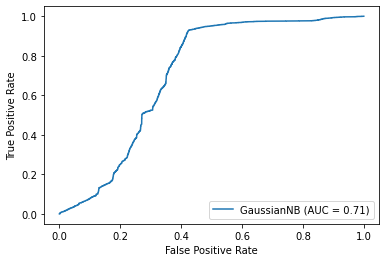

In [10]:
prob_0 = y_train[y_train ==0].shape[0]/y_train.shape[0]
prob_1 = y_train[y_train ==1].shape[0]/y_train.shape[0]
probs = np.array([prob_0,prob_1])
model,tym = gaussian_classification(X_train,y_train,X_test,y_test,probs)
train_acc,test_acc,roc = plotModel(model,X_train,y_train,X_test,y_test)
print ("Elapsed time:            "+"{:.4f}".format(tym)+" sec")
print ("Training accuracy score: "+"{:.4f}".format(train_acc)+"%")
print ("Test accuracy score:     "+"{:.4f}".format(test_acc)+"%")
print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")


## 5. MONTREAL CRIME DATASET

### Data Loading

In [11]:
le = sklearn.preprocessing.LabelEncoder()
training_dataset_url = os.path.join(montreal_crime_dataset_directory, 'interventionscitoyendo.csv')

category_mapping = {'Introduction':1, 'Vol dans / sur véhicule à moteur':2, 'Vol de véhicule à moteur':3, 'Méfait':4, 'Vol qualifié':5, 'Infraction entraînant la mort':6, 'Vols qualifiés':5, 'Infractions entrainant la mort':6}

data_mtlcrime = pd.read_csv(training_dataset_url,encoding='latin1',nrows=30000).replace(category_mapping)
data_mtlcrime['YEAR']=data_mtlcrime.DATE.str.split('-').str[0].astype(np.int32)
data_mtlcrime['MONTH']=data_mtlcrime.DATE.str.split('-').str[1].astype(np.int32)
data_mtlcrime['DAY']=data_mtlcrime.DATE.str.split('-').str[2].astype(np.int32)
data_mtlcrime.dropna(inplace=True)
X = data_mtlcrime.iloc[:,[i for i in range(2,11)]]
X.iloc[:,0] = le.fit_transform(X.iloc[:,0])

y = data_mtlcrime.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### Plot

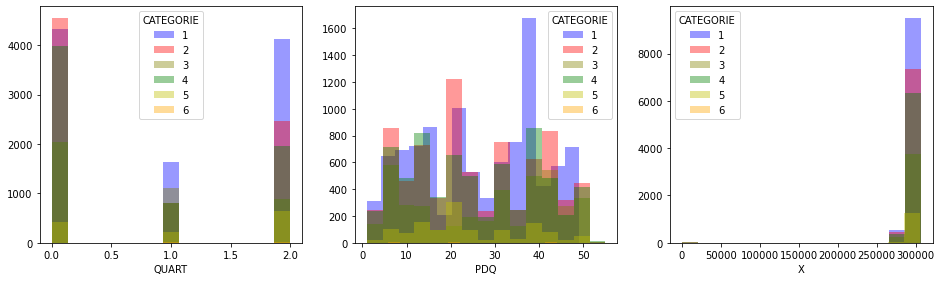

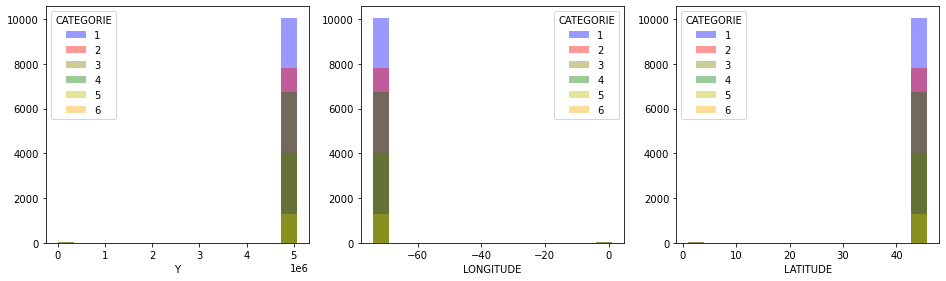

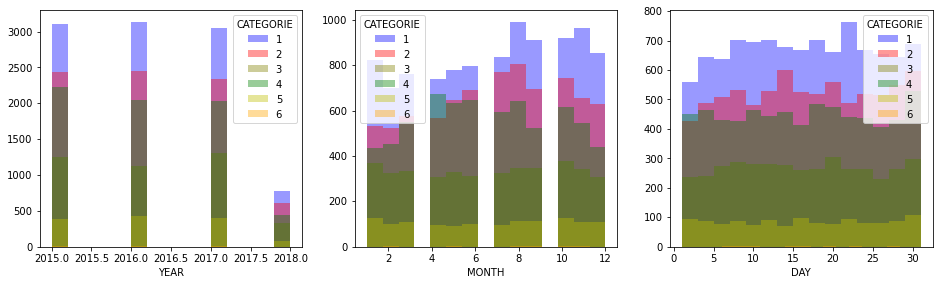

In [122]:
palette = {1: "b", 2: "r",3:"olive",4:"g",5:'y',6:'orange'}
plot_feature_outcome_corr(pd.concat([X,y],axis=1),palette)

### SVM

In [12]:
model,tym = svm_classification(X_train,y_train,X_test,y_test)
train_acc,test_acc,roc = plotModel(model,X_train,y_train,X_test,y_test)
print ("Elapsed time:            "+"{:.4f}".format(tym)+" sec")
print ("Training accuracy score: "+"{:.4f}".format(train_acc)+"%")
print ("Test accuracy score:     "+"{:.4f}".format(test_acc)+"%")
print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")

Elapsed time:            157.2535 sec
Training accuracy score: 33.4667%
Test accuracy score:     34.3500%
ROC AUC score:           50.0926%


### GAUSSIAN NAIVE BAYES

In [13]:
prob_1 = y_train[y_train ==1].shape[0]/y_train.shape[0]
prob_2 = y_train[y_train ==2].shape[0]/y_train.shape[0]
prob_3 = y_train[y_train ==3].shape[0]/y_train.shape[0]
prob_4 = y_train[y_train ==4].shape[0]/y_train.shape[0]
prob_5 = y_train[y_train ==5].shape[0]/y_train.shape[0]
prob_6 = y_train[y_train ==6].shape[0]/y_train.shape[0]
probs = np.array([prob_1,prob_2,prob_3,prob_4,prob_5,prob_6])
model,tym = gaussian_classification(X_train,y_train,X_test,y_test,probs)
train_acc,test_acc,roc = plotModel(model,X_train,y_train,X_test,y_test)
print ("Elapsed time:            "+"{:.4f}".format(tym)+" sec")
print ("Training accuracy score: "+"{:.4f}".format(train_acc)+"%")
print ("Test accuracy score:     "+"{:.4f}".format(test_acc)+"%")
print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")


Elapsed time:            0.0130 sec
Training accuracy score: 33.2750%
Test accuracy score:     34.1333%
ROC AUC score:           50.1138%


## 6.CREDIT CARDS DATA

### Data Loading

In [14]:
training_dataset_url = os.path.join(credit_cards_dataset_directory, 'default_of_credit_card_clients.csv')
data_creditcards = pd.read_csv(training_dataset_url,skiprows=1,usecols=[i for i in range(1,25)])

In [15]:
X = data_creditcards.iloc[:,:-1]
y= data_creditcards.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### SVM

Elapsed time:            138.9301 sec
Training accuracy score: 77.8542%
Test accuracy score:     78.0833%
ROC AUC score:           54.8293%


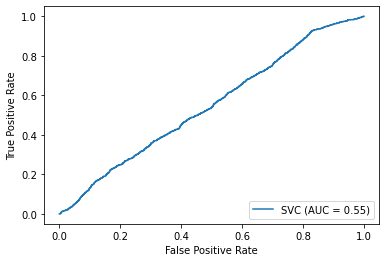

In [16]:
model,tym = svm_classification(X_train,y_train,X_test,y_test)
train_acc,test_acc,roc = plotModel(model,X_train,y_train,X_test,y_test)
print ("Elapsed time:            "+"{:.4f}".format(tym)+" sec")
print ("Training accuracy score: "+"{:.4f}".format(train_acc)+"%")
print ("Test accuracy score:     "+"{:.4f}".format(test_acc)+"%")
print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")

### GAUSSIAN NAIVE BAYES

Elapsed time:            0.0200 sec
Training accuracy score: 40.5917%
Test accuracy score:     39.8833%
ROC AUC score:           67.4331%


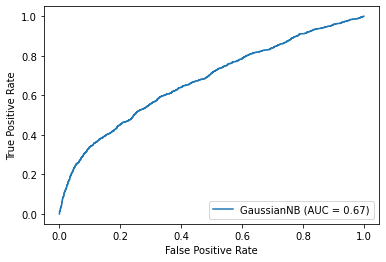

In [17]:
prob_0 = y_train[y_train ==0].shape[0]/y_train.shape[0]
prob_1 = y_train[y_train ==1].shape[0]/y_train.shape[0]
probs = np.array([prob_0,prob_1])
model,tym = gaussian_classification(X_train,y_train,X_test,y_test,probs)
train_acc,test_acc,roc = plotModel(model,X_train,y_train,X_test,y_test)
print ("Elapsed time:            "+"{:.4f}".format(tym)+" sec")
print ("Training accuracy score: "+"{:.4f}".format(train_acc)+"%")
print ("Test accuracy score:     "+"{:.4f}".format(test_acc)+"%")
print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")

## 7. CENSUS INCOME DATASET

### Data Loading

In [18]:
dataset_url = os.path.join(census_income_dataset_directory, 'adult_data.csv')

salary_mapping = {'<=50K':0, '>50K':1}
cols=['age','workclass','fnlwght','education','edu-num','marital-status','occupation','relationship','race','sex','capital-gain',
      'capital-loss','hours-per-week','country','income']
data_census=pd.read_csv(dataset_url, encoding='utf8', names=cols)
data_census = data_census.apply(lambda x: x.apply(lambda y: y.strip() if type(y) == type('') else y), axis=0)
data_census.income = [salary_mapping[i] for i in data_census.income]
data_census = data_census.replace(to_replace='?', value=np.nan)
data_census.dropna(inplace=True)

X = data_census.iloc[:,:-1]
for i in [1,3,5,6,7,8,9,13]:
    X.iloc[:,i] = le.fit_transform(X.iloc[:,i])
y = data_census.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### Plot 

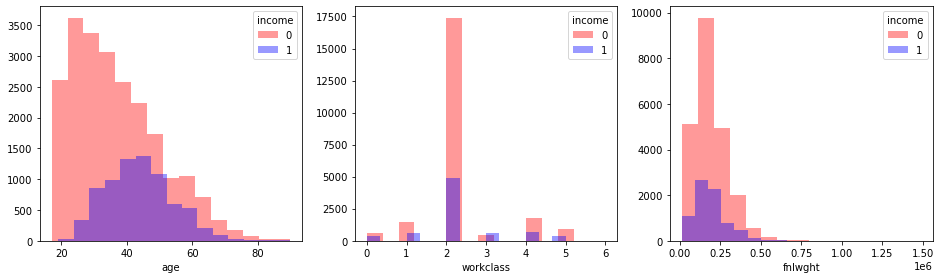

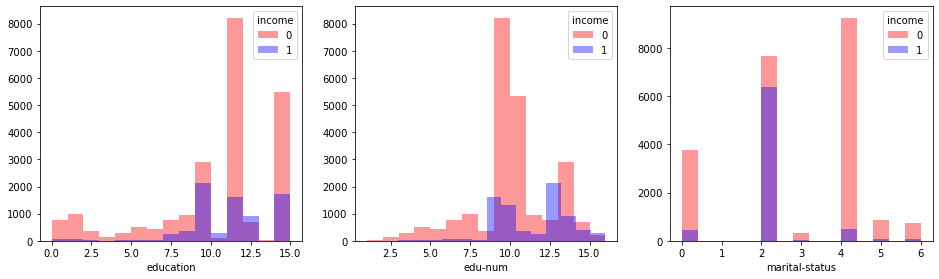

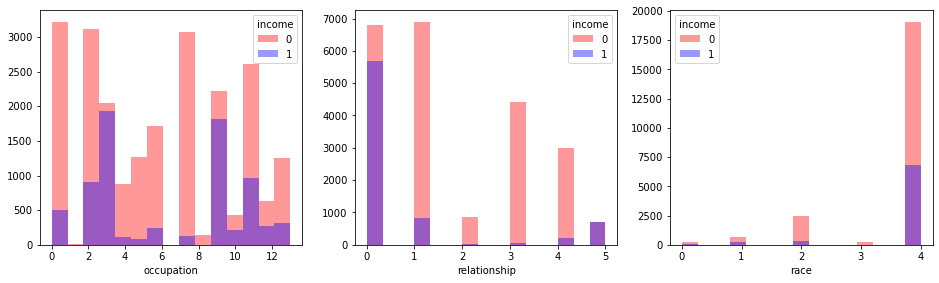

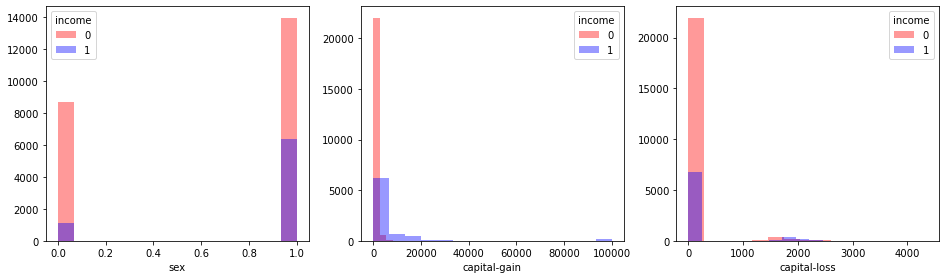

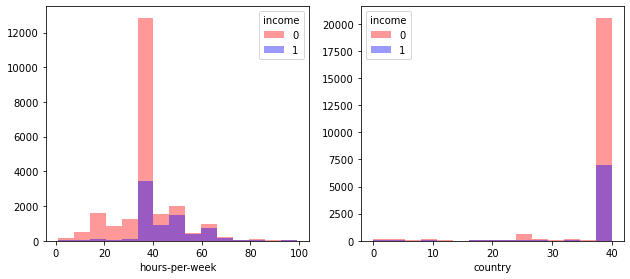

In [34]:
palette = {0:"r",1:"b"}
plot_feature_outcome_corr(pd.concat([X,y],axis=1),palette)


### SVM

Elapsed time:            70.8521 sec
Training accuracy score: 78.6813%
Test accuracy score:     79.1977%
ROC AUC score:           61.5256%


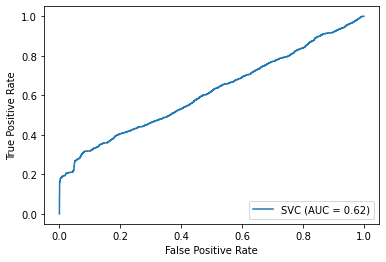

In [19]:
model,tym = svm_classification(X_train,y_train,X_test,y_test)
train_acc,test_acc,roc = plotModel(model,X_train,y_train,X_test,y_test)
print ("Elapsed time:            "+"{:.4f}".format(tym)+" sec")
print ("Training accuracy score: "+"{:.4f}".format(train_acc)+"%")
print ("Test accuracy score:     "+"{:.4f}".format(test_acc)+"%")
print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")

### GAUSSIAN NAIVE BAYES

Elapsed time:            0.0175 sec
Training accuracy score: 78.9672%
Test accuracy score:     78.6673%
ROC AUC score:           82.1779%


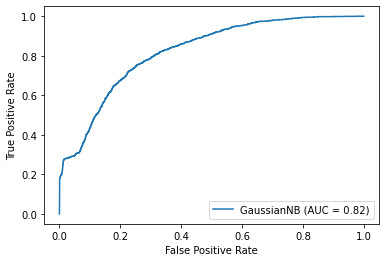

In [20]:
prob_0 = y_train[y_train ==0].shape[0]/y_train.shape[0]
prob_1 = y_train[y_train ==1].shape[0]/y_train.shape[0]
probs = np.array([prob_0,prob_1])
model,tym = gaussian_classification(X_train,y_train,X_test,y_test,probs)
train_acc,test_acc,roc = plotModel(model,X_train,y_train,X_test,y_test)
print ("Elapsed time:            "+"{:.4f}".format(tym)+" sec")
print ("Training accuracy score: "+"{:.4f}".format(train_acc)+"%")
print ("Test accuracy score:     "+"{:.4f}".format(test_acc)+"%")
print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")

## 8. YEAST DATASET

### Data Loading

In [21]:
dataset_url = os.path.join(yeast_dataset_directory, 'yeast_dataset.csv')

cols=['mcg','gvh','alm','mit','erl','pox','vac','nuc','site']
data_yeast = pd.read_csv(dataset_url,usecols=[i for i in range(1,10)],names=cols)
#data_yeast = data_yeast.apply(lambda x: x.apply(lambda y: y.strip() if type(y) == type('') else y), axis=0)

site_mapping = {'MIT':1, 'NUC':2, 'CYT':3
                     , 'ME1':4, 'EXC':5, 'ME2':6
                     , 'ME3':7, 'VAC':8, 'POX':9
                     , 'ERL':10}

data_yeast.site = [site_mapping[i] for i in data_yeast.site]
data_yeast.head()

data_yeast = data_yeast.replace(to_replace='?', value=np.nan)
data_yeast.dropna(inplace=True)

X = data_yeast.iloc[:,:-1]
y= data_yeast.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### Plot

### SVM

In [22]:
model,tym = svm_classification(X_train,y_train,X_test,y_test)
train_acc,test_acc,roc = plotModel(model,X_train,y_train,X_test,y_test)
print ("Elapsed time:            "+"{:.4f}".format(tym)+" sec")
print ("Training accuracy score: "+"{:.4f}".format(train_acc)+"%")
print ("Test accuracy score:     "+"{:.4f}".format(test_acc)+"%")
print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")

Elapsed time:            0.2135 sec
Training accuracy score: 61.8366%
Test accuracy score:     59.2593%
ROC AUC score:           73.0302%


### GAUSSIAN NAIVE BAYES

In [23]:
prob_1 = y_train[y_train ==1].shape[0]/y_train.shape[0]
prob_2 = y_train[y_train ==2].shape[0]/y_train.shape[0]
prob_3 = y_train[y_train ==3].shape[0]/y_train.shape[0]
prob_4 = y_train[y_train ==4].shape[0]/y_train.shape[0]
prob_5 = y_train[y_train ==5].shape[0]/y_train.shape[0]
prob_6 = y_train[y_train ==6].shape[0]/y_train.shape[0]
prob_7 = y_train[y_train ==7].shape[0]/y_train.shape[0]
prob_8 = y_train[y_train ==8].shape[0]/y_train.shape[0]
prob_9 = y_train[y_train ==9].shape[0]/y_train.shape[0]
prob_10 = y_train[y_train ==10].shape[0]/y_train.shape[0]
probs = np.array([prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,prob_10])
model,tym = gaussian_classification(X_train,y_train,X_test,y_test,probs)
train_acc,test_acc,roc = plotModel(model,X_train,y_train,X_test,y_test)
print ("Elapsed time:            "+"{:.4f}".format(tym)+" sec")
print ("Training accuracy score: "+"{:.4f}".format(train_acc)+"%")
print ("Test accuracy score:     "+"{:.4f}".format(test_acc)+"%")
print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")

Elapsed time:            0.0030 sec
Training accuracy score: 21.3985%
Test accuracy score:     20.5387%
ROC AUC score:           57.9185%
